In [1]:
from __future__ import division
import numpy as np
from numpy import linalg as lg
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'cm'
rcParams['font.family'] = 'STIXGeneral'

from funcs import *
from class_tBLG import *

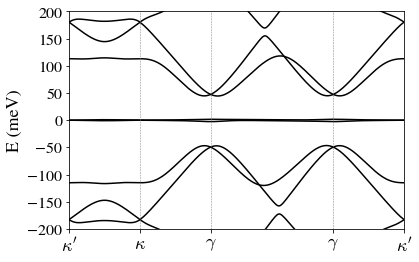

In [2]:
"""
    band structure variables
"""
theta = 1.05
valley = 1
w0 = 117 # meV, interlayer tunneling strength
T_ratio = 0.7 # w_AA/w_AB
N_shell = 3 # num of shells, N_shell >= 2, N_shell <= 4 for this compare_neighbors
compare_neighbors = np.array(([0, 1, -2],\
                              [0, 1, 2, -2, -3],\
                              [0, 1, 2, 3, -2, -3, -4],\
                              [0, 1, 2, 3, 4, -2, -3, -4, -5],\
                              [0, 1, 2, 3, 4, 5, -2, -3, -4, -5, -6]), dtype=object)


"""
    set up instances
"""
masses = np.array([0, 0])
TG_case = tBLG(theta, valley, masses, w0, T_ratio, N_shell, compare_neighbors)
V_sites  = 0*np.array([1/2, -1/2]) # onsite energy    


"""
    some useful parameters
"""    
theta_rad = theta*np.pi/180
k_BZ_sl = 4*np.pi/3/TG_case.a_graphene # graphene BZ side length
k_MBZ_sl = abs(2*k_BZ_sl*np.sin( theta/2*np.pi/180 ))#abs( 8*np.pi/3/TG_case.a_graphene*np.sin(theta/2*np.pi/180) )
a_M = TG_case.a_graphene/(theta_rad) # lattice constant of Moire superlattice
area_M = a_M**2*np.sin(60*np.pi/180) # area of Moire superlattice
b_M = k_MBZ_sl*np.sqrt(3)

q_3, layer1_q, layer2_q = basis(theta, valley, TG_case.a_graphene, N_shell, compare_neighbors)
N_bands = TG_case.N_layers * (np.shape(layer1_q)[0] + np.shape(layer2_q)[0])
k, k_prime, gamma, gamma2 = high_sym_points(theta, valley, TG_case.a_graphene)

"""
    set initial energy shift to make sure that energy at kappa is 0
"""
V_sites0 = 0*np.array([1/2, -1/2]) 
val0, vec0 = lg.eigh( TG_case.hamil(0, 0, V_sites0, 0) )
shift0 = - (val0[N_bands//2-1] + val0[N_bands//2])/2


"""
    sampling along high-symmetry lines
"""
Nk = 80 # num of k points on segment with length k_MBZ_sl
Nk_D = np.int(np.sqrt(3)*Nk)

### k' -> k -> gamma -> m -> k'
kx1 = list( np.linspace(k_prime[0], k[0], Nk) )
ky1 = list( np.linspace(k_prime[1], k[1], Nk) )
kx2 = list( np.linspace(k[0]+(gamma[0]-k[0])/(Nk-1), gamma[0], Nk-1) )
ky2 = list( np.linspace(k[1]+(gamma[1]-k[1])/(Nk-1), gamma[1], Nk-1) )
kx3 = list( np.linspace(gamma[0]+(gamma2[0]-gamma[0])/(Nk_D-1), gamma2[0], Nk_D-1) )
ky3 = list( np.linspace(gamma[1]+(gamma2[1]-gamma[1])/(Nk_D-1), gamma2[1], Nk_D-1) )
kx4 = list( np.linspace(gamma2[0]+(k_prime[0]-gamma2[0])/(Nk-1), k_prime[0], Nk-1) )
ky4 = list( np.linspace(gamma2[1]+(k_prime[1]-gamma2[1])/(Nk-1), k_prime[1], Nk-1) )

kxx = np.array( kx1 + kx2 + kx3 + kx4 )
kyy = np.array( ky1 + ky2 + ky3 + ky4 )
Nk_tot = np.size(kxx)


"""
    band structure
"""
eigen_val = np.zeros((Nk_tot, N_bands))
for ii in range(Nk_tot):
    kx, ky = kxx[ii], kyy[ii]
    val, vec = lg.eigh( TG_case.hamil(kx, ky, V_sites, shift0) )
    eigen_val[ii] = val
    
fig = plt.figure()
fig.patch.set_facecolor('white')
for i in range(0, N_bands):
    plt.plot(np.linspace(0, Nk_tot-1, Nk_tot), eigen_val[:, i], color='black',linewidth=1.5)
plt.axvline(Nk-1,linestyle='--',linewidth=0.5, color='grey')
plt.axvline(2*Nk-2,linestyle='--',linewidth=0.5, color='grey')
plt.axvline(2*Nk+Nk_D-3,linestyle='--',linewidth=0.5, color='grey')
plt.ylabel('E (meV)',fontsize=18)
plt.xlim(0, Nk_tot-1)
plt.ylim([-200, 200])
plt.xticks([0, Nk-1, 2*Nk-2, 2*Nk+Nk_D-3, Nk_tot-1], (['$\kappa^\prime$','$\kappa$','$\gamma$','$\gamma$','$\kappa^\prime$']),fontsize=18)
plt.yticks(fontsize=16)
#plt.gca().set_aspect(Nk_tot/400)
plt.savefig(str(theta)+'.pdf', bbox_inches='tight')

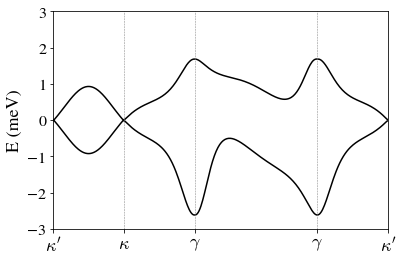

In [3]:
fig = plt.figure()
fig.patch.set_facecolor('white')
for i in range(0, N_bands):
    plt.plot(np.linspace(0, Nk_tot-1, Nk_tot), eigen_val[:, i], color='black',linewidth=1.5)
plt.axvline(Nk-1,linestyle='--',linewidth=0.5, color='grey')
plt.axvline(2*Nk-2,linestyle='--',linewidth=0.5, color='grey')
plt.axvline(2*Nk+Nk_D-3,linestyle='--',linewidth=0.5, color='grey')
plt.ylabel('E (meV)',fontsize=18)
plt.xlim(0, Nk_tot-1)
plt.ylim([-3, 3])
plt.xticks([0, Nk-1, 2*Nk-2, 2*Nk+Nk_D-3, Nk_tot-1], (['$\kappa^\prime$','$\kappa$','$\gamma$','$\gamma$','$\kappa^\prime$']),fontsize=18)
plt.yticks(fontsize=16)
#plt.gca().set_aspect(Nk_tot/400)
plt.savefig(str(theta)+'_zoom.pdf', bbox_inches='tight')

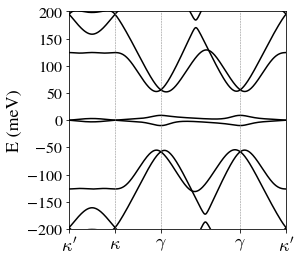

In [4]:
"""
    band structure variables
"""
theta = 1.1
valley = 1
w0 = 117 # meV, interlayer tunneling strength
T_ratio = 0.7 # w_AA/w_AB
N_shell = 3 # num of shells, N_shell >= 2, N_shell <= 4 for this compare_neighbors
compare_neighbors = np.array(([0, 1, -2],\
                              [0, 1, 2, -2, -3],\
                              [0, 1, 2, 3, -2, -3, -4],\
                              [0, 1, 2, 3, 4, -2, -3, -4, -5],\
                              [0, 1, 2, 3, 4, 5, -2, -3, -4, -5, -6]), dtype=object)


"""
    set up instances
"""
masses = np.array([0, 0])
TG_case = tBLG(theta, valley, masses, w0, T_ratio, N_shell, compare_neighbors)
V_sites  = 0*np.array([1/2, -1/2]) # onsite energy    


"""
    some useful parameters
"""    
theta_rad = theta*np.pi/180
k_BZ_sl = 4*np.pi/3/TG_case.a_graphene # graphene BZ side length
k_MBZ_sl = abs(2*k_BZ_sl*np.sin( theta/2*np.pi/180 ))#abs( 8*np.pi/3/TG_case.a_graphene*np.sin(theta/2*np.pi/180) )
a_M = TG_case.a_graphene/(theta_rad) # lattice constant of Moire superlattice
area_M = a_M**2*np.sin(60*np.pi/180) # area of Moire superlattice
b_M = k_MBZ_sl*np.sqrt(3)

q_3, layer1_q, layer2_q = basis(theta, valley, TG_case.a_graphene, N_shell, compare_neighbors)
N_bands = TG_case.N_layers * (np.shape(layer1_q)[0] + np.shape(layer2_q)[0])
k, k_prime, gamma, gamma2 = high_sym_points(theta, valley, TG_case.a_graphene)

"""
    set initial energy shift to make sure that energy at kappa is 0
"""
V_sites0 = 0*np.array([1/2, -1/2]) 
val0, vec0 = lg.eigh( TG_case.hamil(0, 0, V_sites0, 0) )
shift0 = - (val0[N_bands//2-1] + val0[N_bands//2])/2


"""
    sampling along high-symmetry lines
"""
Nk = 80 # num of k points on segment with length k_MBZ_sl
Nk_D = np.int(np.sqrt(3)*Nk)

### k' -> k -> gamma -> m -> k'
kx1 = list( np.linspace(k_prime[0], k[0], Nk) )
ky1 = list( np.linspace(k_prime[1], k[1], Nk) )
kx2 = list( np.linspace(k[0]+(gamma[0]-k[0])/(Nk-1), gamma[0], Nk-1) )
ky2 = list( np.linspace(k[1]+(gamma[1]-k[1])/(Nk-1), gamma[1], Nk-1) )
kx3 = list( np.linspace(gamma[0]+(gamma2[0]-gamma[0])/(Nk_D-1), gamma2[0], Nk_D-1) )
ky3 = list( np.linspace(gamma[1]+(gamma2[1]-gamma[1])/(Nk_D-1), gamma2[1], Nk_D-1) )
kx4 = list( np.linspace(gamma2[0]+(k_prime[0]-gamma2[0])/(Nk-1), k_prime[0], Nk-1) )
ky4 = list( np.linspace(gamma2[1]+(k_prime[1]-gamma2[1])/(Nk-1), k_prime[1], Nk-1) )

kxx = np.array( kx1 + kx2 + kx3 + kx4 )
kyy = np.array( ky1 + ky2 + ky3 + ky4 )
Nk_tot = np.size(kxx)


"""
    band structure
"""
eigen_val = np.zeros((Nk_tot, N_bands))
for ii in range(Nk_tot):
    kx, ky = kxx[ii], kyy[ii]
    val, vec = lg.eigh( TG_case.hamil(kx, ky, V_sites, shift0) )
    eigen_val[ii] = val
    
fig = plt.figure()
fig.patch.set_facecolor('white')
for i in range(0, N_bands):
    plt.plot(np.linspace(0, Nk_tot-1, Nk_tot), eigen_val[:, i], color='black',linewidth=1.5)
plt.axvline(Nk-1,linestyle='--',linewidth=0.5, color='grey')
plt.axvline(2*Nk-2,linestyle='--',linewidth=0.5, color='grey')
plt.axvline(2*Nk+Nk_D-3,linestyle='--',linewidth=0.5, color='grey')
plt.ylabel('E (meV)',fontsize=18)
plt.xlim(0, Nk_tot-1)
plt.ylim([-200, 200])
plt.xticks([0, Nk-1, 2*Nk-2, 2*Nk+Nk_D-3, Nk_tot-1], (['$\kappa^\prime$','$\kappa$','$\gamma$','$\gamma$','$\kappa^\prime$']),fontsize=18)
plt.yticks(fontsize=16)
plt.gca().set_aspect(Nk_tot/400)
plt.savefig(str(theta)+'.pdf', bbox_inches='tight')

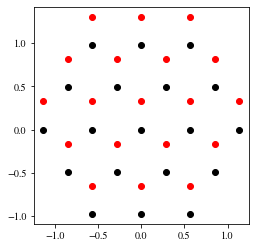

In [5]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
for x,y in TG_case.layer1_q:
    plt.scatter(x,y, color='k')
for x,y in TG_case.layer2_q:
    plt.scatter(x,y, color='r')
    
ax.set_aspect('equal')

In [6]:
k_MBZ_sl

0.3269014787434563

-1.1324199405 0.0
-0.8493149554 -0.4903522181
-0.8493149554 0.4903522181
-0.5662099703 -0.9807044362
-0.5662099703 0.0
-0.5662099703 0.9807044362
-0.2831049851 -0.4903522181
-0.2831049851 0.4903522181
0.0 -0.9807044362
0.0 0.0
0.0 0.9807044362
0.2831049851 -0.4903522181
0.2831049851 0.4903522181
0.5662099703 -0.9807044362
0.5662099703 0.0
0.5662099703 0.9807044362
0.8493149554 -0.4903522181
0.8493149554 0.4903522181
1.1324199405 0.0
layer 2
-1.1324199405 0.3269014787434563
-0.8493149554 -0.1634507393565437
-0.8493149554 0.8172536968434563
-0.5662099703 -0.6538029574565437
-0.5662099703 0.3269014787434563
-0.5662099703 1.3076059149434562
-0.2831049851 -0.1634507393565437
-0.2831049851 0.8172536968434563
0.0 -0.6538029574565437
0.0 0.3269014787434563
0.0 1.3076059149434562
0.2831049851 -0.1634507393565437
0.2831049851 0.8172536968434563
0.5662099703 -0.6538029574565437
0.5662099703 0.3269014787434563
0.5662099703 1.3076059149434562
0.8493149554 -0.1634507393565437
0.8493149554 0.81725369

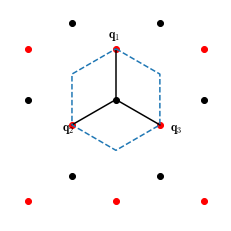

In [7]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
for x,y in TG_case.layer1_q:
    print(x,y)
    plt.scatter(x,y, color='k')
    
print('layer 2')
for x,y in TG_case.layer2_q:
    print(x,y)
    plt.scatter(x,y, color='r')

plt.xlim(-0.7, 0.7)
plt.ylim(-0.8, 0.6)

plt.plot([0, 0], [0, 0.327], 'k')
plt.plot([0, -0.283], [0, -0.163], 'k')
plt.plot([0, 0.283], [0, -0.163], 'k')

#plt.arrow(0, 0, -0.2831049851, -0.1634507393565437, length_includes_head=True)
#plt.arrow(0, 0, 0.2831049851, -0.1634507393565437, length_includes_head=True)
#plt.arrow(0, 0, k_MBZ_sl*np.sqrt(3)/2, k_MBZ_sl*3/2)
#plt.arrow(0, 0, k_MBZ_sl*np.sqrt(3)/2, -k_MBZ_sl*3/2)

#BZ
xs = [0,     0.283,  0.283,      0, -0.283, -0.283, 0]
ys = [0.327, 0.164, -0.163, -0.327, -0.163, 0.164, 0.327]
plt.plot(xs, ys, '--')

fs = 12
plt.text(-0.05,  0.4, r'$\mathbf{q}_1$', fontsize=fs)
plt.text(-0.35, -0.2, r'$\mathbf{q}_2$', fontsize=fs)
plt.text( 0.35, -0.2, r'$\mathbf{q}_3$', fontsize=fs)

ax.set_aspect('equal')
plt.axis('off')
plt.savefig('mBZ.pdf', bbox_inches='tight')

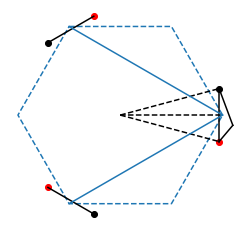

In [8]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

# BZ
xs = [-1/2, 1/2, 1, 1/2, -1/2, -1, -1/2]
ys = [np.sqrt(3)/2, np.sqrt(3)/2, 0, -np.sqrt(3)/2, -np.sqrt(3)/2, 0, np.sqrt(3)/2]
plt.plot(xs, ys, '--')


# Dots
K = 1
theta = 30*np.pi/180
xs = [K*np.cos(theta/2), K*(-np.cos(theta/2)/2-np.sqrt(3)*np.sin(theta/2)/2), 
      K*(-np.cos(theta/2)/2+np.sqrt(3)*np.sin(theta/2)/2)]
ys = [K*np.sin(theta/2), K*(-np.sin(theta/2)/2+np.sqrt(3)*np.cos(theta/2)/2),
      K*(-np.sin(theta/2)/2-np.sqrt(3)*np.cos(theta/2)/2)]
plt.scatter(xs, ys, color='k')

xs = [K*np.cos(-theta/2), K*(-np.cos(-theta/2)/2-np.sqrt(3)*np.sin(-theta/2)/2), 
      K*(-np.cos(-theta/2)/2+np.sqrt(3)*np.sin(-theta/2)/2)]
ys = [K*np.sin(-theta/2), K*(-np.sin(-theta/2)/2+np.sqrt(3)*np.cos(-theta/2)/2),
      K*(-np.sin(-theta/2)/2-np.sqrt(3)*np.cos(-theta/2)/2)]
plt.scatter(xs, ys, color='r')


# Lines
plt.plot([0, 1], [0,0], '--k')
plt.plot([0, K*np.cos(theta/2)],  [0, K*np.sin(theta/2)], '--k')
plt.plot([0, K*np.cos(-theta/2)], [0, K*np.sin(-theta/2)], '--k')


# Arrow
q_mod = 2 * K * np.sin(theta/2)
plt.plot([K*np.cos(-theta/2), K*np.cos(-theta/2)], [K*np.sin(-theta/2), K*np.sin(-theta/2)+q_mod], 'k')
plt.plot([K*(-np.cos(-theta/2)/2-np.sqrt(3)*np.sin(-theta/2)/2), K*(-np.cos(-theta/2)/2-np.sqrt(3)*np.sin(-theta/2)/2)-q_mod*np.sqrt(3)/2],
        [K*(-np.sin(-theta/2)/2+np.sqrt(3)*np.cos(-theta/2)/2),  K*(-np.sin(-theta/2)/2+np.sqrt(3)*np.cos(-theta/2)/2)- q_mod/2], 'k')
plt.plot([K*(-np.cos(-theta/2)/2+np.sqrt(3)*np.sin(-theta/2)/2), K*(-np.cos(-theta/2)/2+np.sqrt(3)*np.sin(-theta/2)/2)+q_mod*np.sqrt(3)/2],
         [K*(-np.sin(-theta/2)/2-np.sqrt(3)*np.cos(-theta/2)/2), K*(-np.sin(-theta/2)/2-np.sqrt(3)*np.cos(-theta/2)/2)-q_mod/2], 'k')


qx = 1.1
qy = -0.1
plt.plot([K*np.cos(theta/2), qx], [K*np.sin(theta/2), qy], 'k')
plt.plot([K*np.cos(-theta/2), qx], [K*np.sin(-theta/2), qy], 'k')


plt.plot([1, -1/2], [0, np.sqrt(3)/2], 'C0')
plt.plot([1, -1/2], [0, -np.sqrt(3)/2], 'C0')

ax.set_aspect('equal')
plt.axis('off')
plt.savefig('BZ.pdf', bbox_inches='tight')

In [9]:
k_BZ_sl

17.02760245848126

# Simulations

## 1.35

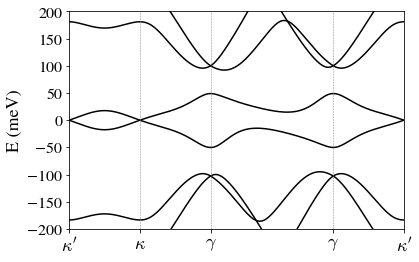

In [10]:
"""
    band structure variables
"""
theta = 1.35
valley = 1
w0 = 117 # meV, interlayer tunneling strength
T_ratio = 0.7 # w_AA/w_AB
N_shell = 3 # num of shells, N_shell >= 2, N_shell <= 4 for this compare_neighbors
compare_neighbors = np.array(([0, 1, -2],\
                              [0, 1, 2, -2, -3],\
                              [0, 1, 2, 3, -2, -3, -4],\
                              [0, 1, 2, 3, 4, -2, -3, -4, -5],\
                              [0, 1, 2, 3, 4, 5, -2, -3, -4, -5, -6]), dtype=object)


"""
    set up instances
"""
masses = np.array([0, 0])
TG_case = tBLG(theta, valley, masses, w0, T_ratio, N_shell, compare_neighbors)
V_sites  = 0*np.array([1/2, -1/2]) # onsite energy    


"""
    some useful parameters
"""    
theta_rad = theta*np.pi/180
k_BZ_sl = 4*np.pi/3/TG_case.a_graphene # graphene BZ side length
k_MBZ_sl = abs(2*k_BZ_sl*np.sin( theta/2*np.pi/180 ))#abs( 8*np.pi/3/TG_case.a_graphene*np.sin(theta/2*np.pi/180) )
a_M = TG_case.a_graphene/(theta_rad) # lattice constant of Moire superlattice
area_M = a_M**2*np.sin(60*np.pi/180) # area of Moire superlattice
b_M = k_MBZ_sl*np.sqrt(3)

q_3, layer1_q, layer2_q = basis(theta, valley, TG_case.a_graphene, N_shell, compare_neighbors)
N_bands = TG_case.N_layers * (np.shape(layer1_q)[0] + np.shape(layer2_q)[0])
k, k_prime, gamma, gamma2 = high_sym_points(theta, valley, TG_case.a_graphene)

"""
    set initial energy shift to make sure that energy at kappa is 0
"""
V_sites0 = 0*np.array([1/2, -1/2]) 
val0, vec0 = lg.eigh( TG_case.hamil(0, 0, V_sites0, 0) )
shift0 = - (val0[N_bands//2-1] + val0[N_bands//2])/2


"""
    sampling along high-symmetry lines
"""
Nk = 80 # num of k points on segment with length k_MBZ_sl
Nk_D = np.int(np.sqrt(3)*Nk)

### k' -> k -> gamma -> m -> k'
kx1 = list( np.linspace(k_prime[0], k[0], Nk) )
ky1 = list( np.linspace(k_prime[1], k[1], Nk) )
kx2 = list( np.linspace(k[0]+(gamma[0]-k[0])/(Nk-1), gamma[0], Nk-1) )
ky2 = list( np.linspace(k[1]+(gamma[1]-k[1])/(Nk-1), gamma[1], Nk-1) )
kx3 = list( np.linspace(gamma[0]+(gamma2[0]-gamma[0])/(Nk_D-1), gamma2[0], Nk_D-1) )
ky3 = list( np.linspace(gamma[1]+(gamma2[1]-gamma[1])/(Nk_D-1), gamma2[1], Nk_D-1) )
kx4 = list( np.linspace(gamma2[0]+(k_prime[0]-gamma2[0])/(Nk-1), k_prime[0], Nk-1) )
ky4 = list( np.linspace(gamma2[1]+(k_prime[1]-gamma2[1])/(Nk-1), k_prime[1], Nk-1) )

kxx = np.array( kx1 + kx2 + kx3 + kx4 )
kyy = np.array( ky1 + ky2 + ky3 + ky4 )
Nk_tot = np.size(kxx)


"""
    band structure
"""
eigen_val = np.zeros((Nk_tot, N_bands))
for ii in range(Nk_tot):
    kx, ky = kxx[ii], kyy[ii]
    val, vec = lg.eigh( TG_case.hamil(kx, ky, V_sites, shift0) )
    eigen_val[ii] = val
    
fig = plt.figure()
fig.patch.set_facecolor('white')
for i in range(0, N_bands):
    plt.plot(np.linspace(0, Nk_tot-1, Nk_tot), eigen_val[:, i], color='black',linewidth=1.5)
plt.axvline(Nk-1,linestyle='--',linewidth=0.5, color='grey')
plt.axvline(2*Nk-2,linestyle='--',linewidth=0.5, color='grey')
plt.axvline(2*Nk+Nk_D-3,linestyle='--',linewidth=0.5, color='grey')
plt.ylabel('E (meV)',fontsize=18)
plt.xlim(0, Nk_tot-1)
plt.ylim([-200, 200])
plt.xticks([0, Nk-1, 2*Nk-2, 2*Nk+Nk_D-3, Nk_tot-1], (['$\kappa^\prime$','$\kappa$','$\gamma$','$\gamma$','$\kappa^\prime$']),fontsize=18)
plt.yticks(fontsize=16)
#plt.gca().set_aspect(Nk_tot/400)
plt.savefig(str(theta)+'.pdf', bbox_inches='tight')

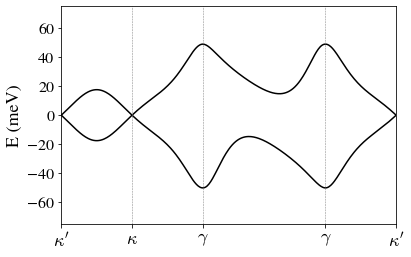

In [13]:
fig = plt.figure()
fig.patch.set_facecolor('white')
for i in range(0, N_bands):
    plt.plot(np.linspace(0, Nk_tot-1, Nk_tot), eigen_val[:, i], color='black',linewidth=1.5)
plt.axvline(Nk-1,linestyle='--',linewidth=0.5, color='grey')
plt.axvline(2*Nk-2,linestyle='--',linewidth=0.5, color='grey')
plt.axvline(2*Nk+Nk_D-3,linestyle='--',linewidth=0.5, color='grey')
plt.ylabel('E (meV)',fontsize=18)
plt.xlim(0, Nk_tot-1)
plt.ylim([-75, 75])
plt.xticks([0, Nk-1, 2*Nk-2, 2*Nk+Nk_D-3, Nk_tot-1], (['$\kappa^\prime$','$\kappa$','$\gamma$','$\gamma$','$\kappa^\prime$']),fontsize=18)
plt.yticks(fontsize=16)
#plt.gca().set_aspect(Nk_tot/400)
plt.savefig(str(theta)+'_zoom.pdf', bbox_inches='tight')

## 1.4

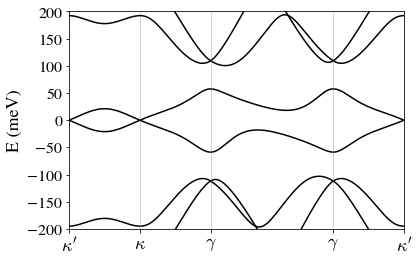

In [14]:
"""
    band structure variables
"""
theta = 1.40
valley = 1
w0 = 117 # meV, interlayer tunneling strength
T_ratio = 0.7 # w_AA/w_AB
N_shell = 3 # num of shells, N_shell >= 2, N_shell <= 4 for this compare_neighbors
compare_neighbors = np.array(([0, 1, -2],\
                              [0, 1, 2, -2, -3],\
                              [0, 1, 2, 3, -2, -3, -4],\
                              [0, 1, 2, 3, 4, -2, -3, -4, -5],\
                              [0, 1, 2, 3, 4, 5, -2, -3, -4, -5, -6]), dtype=object)


"""
    set up instances
"""
masses = np.array([0, 0])
TG_case = tBLG(theta, valley, masses, w0, T_ratio, N_shell, compare_neighbors)
V_sites  = 0*np.array([1/2, -1/2]) # onsite energy    


"""
    some useful parameters
"""    
theta_rad = theta*np.pi/180
k_BZ_sl = 4*np.pi/3/TG_case.a_graphene # graphene BZ side length
k_MBZ_sl = abs(2*k_BZ_sl*np.sin( theta/2*np.pi/180 ))#abs( 8*np.pi/3/TG_case.a_graphene*np.sin(theta/2*np.pi/180) )
a_M = TG_case.a_graphene/(theta_rad) # lattice constant of Moire superlattice
area_M = a_M**2*np.sin(60*np.pi/180) # area of Moire superlattice
b_M = k_MBZ_sl*np.sqrt(3)

q_3, layer1_q, layer2_q = basis(theta, valley, TG_case.a_graphene, N_shell, compare_neighbors)
N_bands = TG_case.N_layers * (np.shape(layer1_q)[0] + np.shape(layer2_q)[0])
k, k_prime, gamma, gamma2 = high_sym_points(theta, valley, TG_case.a_graphene)

"""
    set initial energy shift to make sure that energy at kappa is 0
"""
V_sites0 = 0*np.array([1/2, -1/2]) 
val0, vec0 = lg.eigh( TG_case.hamil(0, 0, V_sites0, 0) )
shift0 = - (val0[N_bands//2-1] + val0[N_bands//2])/2


"""
    sampling along high-symmetry lines
"""
Nk = 80 # num of k points on segment with length k_MBZ_sl
Nk_D = np.int(np.sqrt(3)*Nk)

### k' -> k -> gamma -> m -> k'
kx1 = list( np.linspace(k_prime[0], k[0], Nk) )
ky1 = list( np.linspace(k_prime[1], k[1], Nk) )
kx2 = list( np.linspace(k[0]+(gamma[0]-k[0])/(Nk-1), gamma[0], Nk-1) )
ky2 = list( np.linspace(k[1]+(gamma[1]-k[1])/(Nk-1), gamma[1], Nk-1) )
kx3 = list( np.linspace(gamma[0]+(gamma2[0]-gamma[0])/(Nk_D-1), gamma2[0], Nk_D-1) )
ky3 = list( np.linspace(gamma[1]+(gamma2[1]-gamma[1])/(Nk_D-1), gamma2[1], Nk_D-1) )
kx4 = list( np.linspace(gamma2[0]+(k_prime[0]-gamma2[0])/(Nk-1), k_prime[0], Nk-1) )
ky4 = list( np.linspace(gamma2[1]+(k_prime[1]-gamma2[1])/(Nk-1), k_prime[1], Nk-1) )

kxx = np.array( kx1 + kx2 + kx3 + kx4 )
kyy = np.array( ky1 + ky2 + ky3 + ky4 )
Nk_tot = np.size(kxx)


"""
    band structure
"""
eigen_val = np.zeros((Nk_tot, N_bands))
for ii in range(Nk_tot):
    kx, ky = kxx[ii], kyy[ii]
    val, vec = lg.eigh( TG_case.hamil(kx, ky, V_sites, shift0) )
    eigen_val[ii] = val
    
fig = plt.figure()
fig.patch.set_facecolor('white')
for i in range(0, N_bands):
    plt.plot(np.linspace(0, Nk_tot-1, Nk_tot), eigen_val[:, i], color='black',linewidth=1.5)
plt.axvline(Nk-1,linestyle='--',linewidth=0.5, color='grey')
plt.axvline(2*Nk-2,linestyle='--',linewidth=0.5, color='grey')
plt.axvline(2*Nk+Nk_D-3,linestyle='--',linewidth=0.5, color='grey')
plt.ylabel('E (meV)',fontsize=18)
plt.xlim(0, Nk_tot-1)
plt.ylim([-200, 200])
plt.xticks([0, Nk-1, 2*Nk-2, 2*Nk+Nk_D-3, Nk_tot-1], (['$\kappa^\prime$','$\kappa$','$\gamma$','$\gamma$','$\kappa^\prime$']),fontsize=18)
plt.yticks(fontsize=16)
#plt.gca().set_aspect(Nk_tot/400)
plt.savefig(str(theta)+'.pdf', bbox_inches='tight')

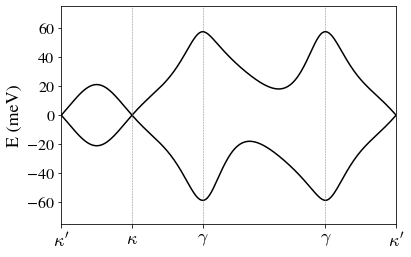

In [15]:
fig = plt.figure()
fig.patch.set_facecolor('white')
for i in range(0, N_bands):
    plt.plot(np.linspace(0, Nk_tot-1, Nk_tot), eigen_val[:, i], color='black',linewidth=1.5)
plt.axvline(Nk-1,linestyle='--',linewidth=0.5, color='grey')
plt.axvline(2*Nk-2,linestyle='--',linewidth=0.5, color='grey')
plt.axvline(2*Nk+Nk_D-3,linestyle='--',linewidth=0.5, color='grey')
plt.ylabel('E (meV)',fontsize=18)
plt.xlim(0, Nk_tot-1)
plt.ylim([-75, 75])
plt.xticks([0, Nk-1, 2*Nk-2, 2*Nk+Nk_D-3, Nk_tot-1], (['$\kappa^\prime$','$\kappa$','$\gamma$','$\gamma$','$\kappa^\prime$']),fontsize=18)
plt.yticks(fontsize=16)
#plt.gca().set_aspect(Nk_tot/400)
plt.savefig(str(theta)+'_zoom.pdf', bbox_inches='tight')

## 1.45

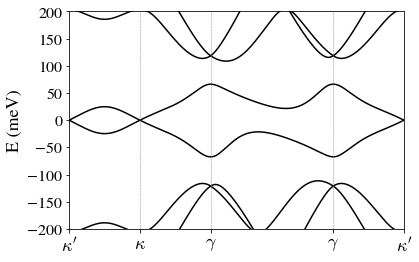

In [16]:
"""
    band structure variables
"""
theta = 1.45
valley = 1
w0 = 117 # meV, interlayer tunneling strength
T_ratio = 0.7 # w_AA/w_AB
N_shell = 3 # num of shells, N_shell >= 2, N_shell <= 4 for this compare_neighbors
compare_neighbors = np.array(([0, 1, -2],\
                              [0, 1, 2, -2, -3],\
                              [0, 1, 2, 3, -2, -3, -4],\
                              [0, 1, 2, 3, 4, -2, -3, -4, -5],\
                              [0, 1, 2, 3, 4, 5, -2, -3, -4, -5, -6]), dtype=object)


"""
    set up instances
"""
masses = np.array([0, 0])
TG_case = tBLG(theta, valley, masses, w0, T_ratio, N_shell, compare_neighbors)
V_sites  = 0*np.array([1/2, -1/2]) # onsite energy    


"""
    some useful parameters
"""    
theta_rad = theta*np.pi/180
k_BZ_sl = 4*np.pi/3/TG_case.a_graphene # graphene BZ side length
k_MBZ_sl = abs(2*k_BZ_sl*np.sin( theta/2*np.pi/180 ))#abs( 8*np.pi/3/TG_case.a_graphene*np.sin(theta/2*np.pi/180) )
a_M = TG_case.a_graphene/(theta_rad) # lattice constant of Moire superlattice
area_M = a_M**2*np.sin(60*np.pi/180) # area of Moire superlattice
b_M = k_MBZ_sl*np.sqrt(3)

q_3, layer1_q, layer2_q = basis(theta, valley, TG_case.a_graphene, N_shell, compare_neighbors)
N_bands = TG_case.N_layers * (np.shape(layer1_q)[0] + np.shape(layer2_q)[0])
k, k_prime, gamma, gamma2 = high_sym_points(theta, valley, TG_case.a_graphene)

"""
    set initial energy shift to make sure that energy at kappa is 0
"""
V_sites0 = 0*np.array([1/2, -1/2]) 
val0, vec0 = lg.eigh( TG_case.hamil(0, 0, V_sites0, 0) )
shift0 = - (val0[N_bands//2-1] + val0[N_bands//2])/2


"""
    sampling along high-symmetry lines
"""
Nk = 80 # num of k points on segment with length k_MBZ_sl
Nk_D = np.int(np.sqrt(3)*Nk)

### k' -> k -> gamma -> m -> k'
kx1 = list( np.linspace(k_prime[0], k[0], Nk) )
ky1 = list( np.linspace(k_prime[1], k[1], Nk) )
kx2 = list( np.linspace(k[0]+(gamma[0]-k[0])/(Nk-1), gamma[0], Nk-1) )
ky2 = list( np.linspace(k[1]+(gamma[1]-k[1])/(Nk-1), gamma[1], Nk-1) )
kx3 = list( np.linspace(gamma[0]+(gamma2[0]-gamma[0])/(Nk_D-1), gamma2[0], Nk_D-1) )
ky3 = list( np.linspace(gamma[1]+(gamma2[1]-gamma[1])/(Nk_D-1), gamma2[1], Nk_D-1) )
kx4 = list( np.linspace(gamma2[0]+(k_prime[0]-gamma2[0])/(Nk-1), k_prime[0], Nk-1) )
ky4 = list( np.linspace(gamma2[1]+(k_prime[1]-gamma2[1])/(Nk-1), k_prime[1], Nk-1) )

kxx = np.array( kx1 + kx2 + kx3 + kx4 )
kyy = np.array( ky1 + ky2 + ky3 + ky4 )
Nk_tot = np.size(kxx)


"""
    band structure
"""
eigen_val = np.zeros((Nk_tot, N_bands))
for ii in range(Nk_tot):
    kx, ky = kxx[ii], kyy[ii]
    val, vec = lg.eigh( TG_case.hamil(kx, ky, V_sites, shift0) )
    eigen_val[ii] = val
    
fig = plt.figure()
fig.patch.set_facecolor('white')
for i in range(0, N_bands):
    plt.plot(np.linspace(0, Nk_tot-1, Nk_tot), eigen_val[:, i], color='black',linewidth=1.5)
plt.axvline(Nk-1,linestyle='--',linewidth=0.5, color='grey')
plt.axvline(2*Nk-2,linestyle='--',linewidth=0.5, color='grey')
plt.axvline(2*Nk+Nk_D-3,linestyle='--',linewidth=0.5, color='grey')
plt.ylabel('E (meV)',fontsize=18)
plt.xlim(0, Nk_tot-1)
plt.ylim([-200, 200])
plt.xticks([0, Nk-1, 2*Nk-2, 2*Nk+Nk_D-3, Nk_tot-1], (['$\kappa^\prime$','$\kappa$','$\gamma$','$\gamma$','$\kappa^\prime$']),fontsize=18)
plt.yticks(fontsize=16)
#plt.gca().set_aspect(Nk_tot/400)
plt.savefig(str(theta)+'.pdf', bbox_inches='tight')

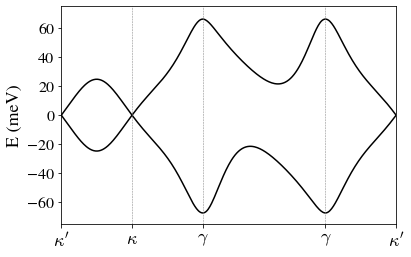

In [17]:
fig = plt.figure()
fig.patch.set_facecolor('white')
for i in range(0, N_bands):
    plt.plot(np.linspace(0, Nk_tot-1, Nk_tot), eigen_val[:, i], color='black',linewidth=1.5)
plt.axvline(Nk-1,linestyle='--',linewidth=0.5, color='grey')
plt.axvline(2*Nk-2,linestyle='--',linewidth=0.5, color='grey')
plt.axvline(2*Nk+Nk_D-3,linestyle='--',linewidth=0.5, color='grey')
plt.ylabel('E (meV)',fontsize=18)
plt.xlim(0, Nk_tot-1)
plt.ylim([-75, 75])
plt.xticks([0, Nk-1, 2*Nk-2, 2*Nk+Nk_D-3, Nk_tot-1], (['$\kappa^\prime$','$\kappa$','$\gamma$','$\gamma$','$\kappa^\prime$']),fontsize=18)
plt.yticks(fontsize=16)
#plt.gca().set_aspect(Nk_tot/400)
plt.savefig(str(theta)+'_zoom.pdf', bbox_inches='tight')

# Understanding the continuum model

Starting in the basis of layer $|i\rangle$, and ignroing any onsite poential, mass, or shift between the layers, can write our Hamiltonian

\begin{equation}
    H =
    \begin{pmatrix}
        h(\theta/2) & H_T \\
        H_T^\dagger & h(-\theta/2)
    \end{pmatrix}
\end{equation}

Where

\begin{equation}
    h_\mathbf{k}(\theta) = -vk
    \begin{pmatrix}
        0 & e^{i(\theta_k - \theta)} \\
         e^{-i(\theta_k - \theta)} & 0
    \end{pmatrix}
\end{equation}

is the Dirac-Hamiltonian for a layer rotated by an angle $\theta$, v is the Dirac velocity, $\mathbf{k}$ is the momentum measure from the layer's Dirac point, $\theta_k$ is the momentum orientation relative to the x axis, and the spinor Hamiltonian acts on the individual layer's A and B sublattice degrees-of-freedom

To derive a continuum model for the tunneling Hamiltonian $H_T$, we assume that the interlayer tunneling amplitude between $\pi$-orbitals is a smooth function $t(r)$ of spatial separation of the graphene planes. We can make a few more simplifying assumptions:
- the spectrum is independent of a displacement $\mathbf{d}$ between the layers, so we will assume it is zero
- the Fourier transform of the tunneling amplitude falls quickly to zero on the reciprocal lattice vector scale. We can therefore only consider tunneling between a Dirac point and its equivalent first BZ counterpart.

Under these assumptions, the matrix element of $H_T$ between sublattice $\beta$ on one layer hopping to sublattice $\alpha$ on the other layer

\begin{equation}
    T^{\alpha \beta}(\mathbf{r}) = w \sum_{j=1}^3 \exp(-i \mathbf{q}_j\cdot\mathbf{r})T_j^{\alpha \beta}
\end{equation}

where

\begin{gather}
    T_1 = 
    \begin{pmatrix}
    1 & 1 \\
    1 & 1 \\
    \end{pmatrix} \\
    T_2 = 
    \begin{pmatrix}
    e^{i\phi} & 1 \\
    e^{-i\phi} & e^{i\phi}
    \end{pmatrix} \\
    T_3 = 
    \begin{pmatrix}
    e^{-i\phi} & 1 \\
    e^{i\phi} & e^{-i\phi}
    \end{pmatrix}
\end{gather}

$w=t_{k_D}/\Omega\approx 110\ \mathrm{meV}$ and $\phi=2\phi /3$. The three $\mathbf{q}_j$'s are Dirac model momentum transfers that correspond to the three interlayer hopping processes

If we consider relaxation, we are effectively modifying the tunneling between AA stacked regions and AB stacked regions. In this case, the above matricies become

\begin{gather}
    T_1 = 
    \begin{pmatrix}
    w_{AA}/w_{AB} & 1 \\
    1 & w_{AA}/w_{AB} \\
    \end{pmatrix} \\
    T_2 = 
    \begin{pmatrix}
    w_{AA}/w_{AB} e^{i\phi} & 1 \\
    e^{-i\phi} & w_{AA}/w_{AB} e^{i\phi}
    \end{pmatrix} \\
    T_3 = 
    \begin{pmatrix}
    w_{AA}/w_{AB} e^{-i\phi} & 1 \\
    e^{i\phi} & w_{AA}/w_{AB} e^{-i\phi}
    \end{pmatrix}
\end{gather}

## Questions

1: I am always confused with the setup for these sorts of tight binding calculations. We are considering two sheets of atoms of a given size. What determines how big of a sheet we should simulate? Does it matter if we do periodic boundary conditions? It seems in this case that we are only considering hopping between Dirac points, so our sheets can be quite small? 

2: I am not sure I understand if I have the description of relaxation correct and how multiplying the diagonal elements by this energy ratio accomplishes this

3: I also think I understand how this is being done numerically. You are checking the wave fector between different Dirac points of the nearest neighbors and checking which q vector they are close to. This then maps to which $T_i$ that term should be. I would like to walk through this and make sure I understand the matrix correctly though. Ie. understanding the basis of the full matrix and which elements correspond to which tunneling event

4: What happened to the $r$ dependence in $T^{\alpha \beta}(r)$?

5: What is N_shells? It looks like it is used mostly for compare_neighbors?

6: Understanding why continuum model is important: recover periodicity, overcome Wannier obstruction

## Notes from latest paper

- Focus on state at $\nu = -3$, insulating state which is fully spin and valley polarized
- Main question: are there collective excitations that lie below the continuum of inter-band particle-hole excitations throughout the mBZ?
    - Any such excitation will act like a bosonic dof that lives on the moir\'es triangular lattice. 
    - They would control the dynamical response and thermal fuctuation properties of the insulating states at energies below the gap
- Find a single collective mode for each inter-band transition that remains well below the gapped particle-hole continuum throughout the BZ
    - excitations represent local changes in the spin/valley/orbital state within a given moir\'e unit cell that avoid changing the number of electrons per period in any unit cell. 
    - This corresponds to seven reletively flat low-energy collective modes for $\nu=-3$. They are of very low energy, so there are seven independent magnon-like dof for each moir\'e unit cell in real space. 
    - Suggests the low energy physics at $\nu=-3$ is cpatured by an effective $SU(8)$ spin model having one 8-component gneralized spin per moir\'e unit cell that incorporates real spin, vally, and orbital dof. The spin-wave spectrum consistes of a gapless Golstone mode corresponding to $SU(2)_+$ to $U(1)_+$ summetry breaking. 
    - The valley-wave specctrum has a small gap because the single-particle H of the two valleys are different
    